![](https://images.all-free-download.com/images/graphiclarge/house_flat_style_vector_background_583184.jpg)

# real estate investment
is one best type of invastment becouse the statble,The benefits of investing in real estate are numerous
With well-chosen assets, investors can enjoy predictable cash flow, excellent returns, tax advantages, and diversification—and it's possible to leverage real estate to build wealth.
Real estate investors make money through rental income, any profits generated by property-dependent business activity, and appreciation. Real estate values tend to increase over time, and with a good investment, you can turn a profit when it's time to sell. Rents also tend to rise over time, which can lead to higher cash flow. 
This chart from the Federal Reserve Bank of St. Louis shows average home prices in the U.S. since 1963. The areas shaded in grey indicate U.S. recessions

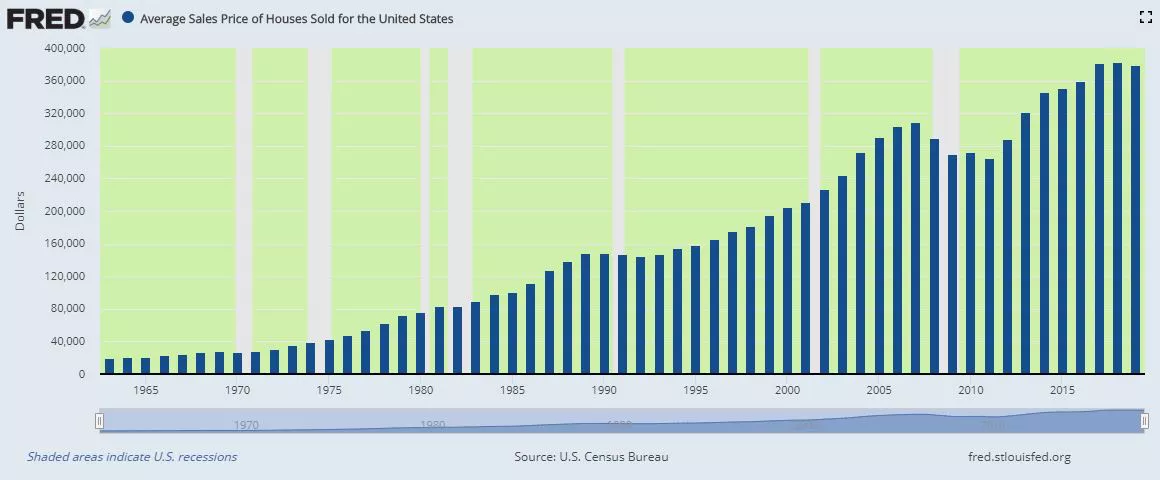

i'm from finance background but im love coding and I know that the analyzing and predicting is very important to making decision and I think it is the best tool for making decisions

This kernel helps me a lot, I just learned how to do things as parts, but when I started, I had to put all of these parts together into one project, this is very difficult for me, this is my first kernel and I saw great kernels learning a lot of things and I saw a new codes , It really helps me a lot and i thank everyone for sharing the kernel of this thing really helps the beginners a lot

# Goals
1. reading the Data 
2. analyzing Data 
3. preprocessing Data 
4. predict

 Libarary
******

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns 
from scipy import stats
from scipy.stats import norm , skew 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
import missingno as msno
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler ,scale
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
import warnings
warnings.filterwarnings('ignore')

Read the data 


In [ ]:
Train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
Test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
pd.set_option('display.max_columns', None)
Train.head(10)

In [ ]:
Train.columns.values

In [ ]:
Train['SalePrice'].describe()

In [ ]:
Data=Train['SalePrice']
fig = px.box(Data, x='SalePrice', points="all" ,title="Sale Price Box Plot")
fig.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(Train['SalePrice'], color= "red" )
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()
print("Skewness: %f" % Train['SalePrice'].skew())
print("Kurtosis: %f" % Train['SalePrice'].kurt())

There is a problem with kurtosis but I will fix it later

Let's see a comprehensive look at the categorical features

In [ ]:
Train.describe().T

and now numerical feature

In [ ]:
Train.describe(include='O').T

All correlation 

In [ ]:
corr=Train.corr()
corr=corr.sort_values(by='SalePrice')
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]
fig= go.Figure(data=go.Heatmap(z=corr.values,  y=corr.index,x=corr.columns, colorscale=colorscale))
fig.update_layout(
    autosize=False,
    width=850,
    height=850)
fig.show()


Now the Top 10

In [ ]:
top=10
top_corr=corr.nlargest(top,'SalePrice')['SalePrice'].index
top_corr_values=np.corrcoef(Train[top_corr.values].values.T)
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]
fig= go.Figure(data=go.Heatmap(z=top_corr_values,  y=top_corr,x=top_corr, colorscale=colorscale))
fig.update_layout(
    autosize=False,
    width=500,
    height=500)

fig.show()

Let's make a quick analysis

In [ ]:
df=Train[top_corr]
fig = px.scatter_matrix(df,dimensions=top_corr)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='top correlation',
    dragmode='select',
    width=950,
    height=1000,
    hovermode='closest',
)
fig.show()

In [ ]:
data=pd.DataFrame()
data['Year Sold']=Train.groupby(['YrSold']).size().index.astype(str)
data['Houses']=Train.groupby(['YrSold']).size().values
fig=px.bar(data,y='Year Sold',x='Houses',color='Year Sold',title="Top Year Sold")
fig.show()

2009 is the year that homes have been sold the most and the least
It was 2010

In [ ]:
data = pd.concat([Train['SalePrice'], Train['YrSold']], axis=1)
fig = px.box(data, y='SalePrice', x='YrSold',color='YrSold',title="BoxPlot Year Sold")
fig.show()

In [ ]:
fig = px.histogram(Train,x = 'SalePrice',title = 'Distribution of House Price Across Years',nbins=200,color='YrSold'  )
fig.show()

In [ ]:
data=Train.groupby(['YrSold','MSZoning'])['SalePrice'].count().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data['C (all)'], name='C (all)'))
fig.add_trace(go.Bar(x=x, y=data['FV'], name='FV'))
fig.add_trace(go.Bar(x=x, y=data['RH'], name='RH'))
fig.add_trace(go.Bar(x=x, y=data['RL'], name='RL'))
fig.add_trace(go.Bar(x=x, y=data['RM'], name='RM'))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title = 'BarPlot of House Zoining Across Years')
fig.show()

In [ ]:
data=Train.groupby(['YrSold','OverallQual'])['SalePrice'].count().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data[1], name='1'))
fig.add_trace(go.Bar(x=x, y=data[2], name='2'))
fig.add_trace(go.Bar(x=x, y=data[3], name='3'))
fig.add_trace(go.Bar(x=x, y=data[4], name='4'))
fig.add_trace(go.Bar(x=x, y=data[5], name='5'))
fig.add_trace(go.Bar(x=x, y=data[6], name='6'))
fig.add_trace(go.Bar(x=x, y=data[7], name='7'))
fig.add_trace(go.Bar(x=x, y=data[8], name='8'))
fig.add_trace(go.Bar(x=x, y=data[9], name='9'))
fig.add_trace(go.Bar(x=x, y=data[10], name='10'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title = 'BarPlot of Quality Across Years')
fig.show()

In [ ]:
data=pd.DataFrame()
data['Zoining']=Train['MSZoning'].unique()
data['Houses']=Train['MSZoning'].value_counts().values

fig = px.bar(data, x='Houses', y='Zoining',color='Zoining', height=400,title='BarPlot MS Zoining')
fig.show()


In [ ]:
data=pd.concat([Train['SalePrice'],Train['MSZoning']],axis=1)
fig = px.box(data, y='SalePrice', x='MSZoning',color='MSZoning',title='BoxPlot MS Zoining by SalePrice')
fig.show()

In [ ]:
Data=pd.concat([Train['OverallQual'],Train['MSZoning']],axis=1)
fig=px.box(Data,x='OverallQual',y='MSZoning',color='MSZoning',title='BoxPlot MS Zoining by Quality')
fig.show()


In [ ]:
col_name=list(Train['MSZoning'].unique())
labels=list(Train['OverallQual'].unique())
RL=Train[Train['MSZoning']=='RL'][['OverallQual']].value_counts()
RM=Train[Train['MSZoning']=='RM'][['OverallQual']].value_counts()
Call=Train[Train['MSZoning']=='C (all)'][['OverallQual']].value_counts()
FV=Train[Train['MSZoning']=='FV'][['OverallQual']].value_counts()
RH=Train[Train['MSZoning']=='RH'][['OverallQual']].value_counts()
cols=5
rows=1
specs = [[{'type':'domain'}] * cols] * rows
fig = make_subplots(rows=rows, cols=cols,specs=specs,subplot_titles=col_name)
fig.add_trace(go.Pie(labels=labels, values=RL, name="Rl"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=RM, name="RM"),1, 2)
fig.add_trace(go.Pie(labels=labels, values=Call, name="RM"),1, 3)
fig.add_trace(go.Pie(labels=labels, values=FV, name="RM"),1, 4)
fig.add_trace(go.Pie(labels=labels, values=RH, name="RM"),1, 5)
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    title_text=" Distribution Quality in MsZoning")
fig.show()

In [ ]:
data=Train.groupby(['Neighborhood','MSZoning'])['SalePrice'].count().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data['C (all)'], name='C (all)'))
fig.add_trace(go.Bar(x=x, y=data['FV'], name='FV'))
fig.add_trace(go.Bar(x=x, y=data['RH'], name='RH'))
fig.add_trace(go.Bar(x=x, y=data['RL'], name='RL'))
fig.add_trace(go.Bar(x=x, y=data['RM'], name='RM'))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title='BarPlot Distribution Neighborhood by MsZoning')
fig.show()

In [ ]:
data=pd.DataFrame()
data['Neighborhood']=Train['Neighborhood'].unique()
data['Houses']=Train['Neighborhood'].value_counts().values

fig = px.bar(data, y='Neighborhood', x='Houses',color='Neighborhood',title='BarPlot Neighborhood')
fig.show()

In [ ]:
data = pd.concat([Train['SalePrice'], Train['Neighborhood']], axis=1)
fig = px.box(data, y='SalePrice', x='Neighborhood',color='Neighborhood',title='BoxPlot Neighborhood by SalePrice')
fig.show()

In [ ]:
data=Train.groupby(['Neighborhood', 'OverallQual']).size().unstack()
x=data.index
fig = go.Figure(go.Bar(x=x, y=data[1], name=1))
fig.add_trace(go.Bar(x=x, y=data[2], name=2))
fig.add_trace(go.Bar(x=x, y=data[3], name=3))
fig.add_trace(go.Bar(x=x, y=data[4], name=4))
fig.add_trace(go.Bar(x=x, y=data[5], name=5))
fig.add_trace(go.Bar(x=x, y=data[6], name=6))
fig.add_trace(go.Bar(x=x, y=data[7], name=7))
fig.add_trace(go.Bar(x=x, y=data[8], name=8))
fig.add_trace(go.Bar(x=x, y=data[9], name=9))
fig.add_trace(go.Bar(x=x, y=data[10], name=10))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},title='BarPlot Distribution Neighborhood by Qualty')
fig.show()

In [ ]:
col_name=list(Train['MSZoning'].unique())
labels=list(Train['Neighborhood'].unique())
RL=Train[Train['MSZoning']=='RL'][['Neighborhood']].value_counts()
RM=Train[Train['MSZoning']=='RM'][['Neighborhood']].value_counts()
Call=Train[Train['MSZoning']=='C (all)'][['Neighborhood']].value_counts()
FV=Train[Train['MSZoning']=='FV'][['Neighborhood']].value_counts()
RH=Train[Train['MSZoning']=='RH'][['Neighborhood']].value_counts()
cols=5
rows=1
specs = [[{'type':'domain'}] * cols] * rows
fig = make_subplots(rows=rows, cols=cols,specs=specs,subplot_titles=col_name)
fig.add_trace(go.Pie(labels=labels, values=RL, name="Rl"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=RM, name="RM"),1, 2)
fig.add_trace(go.Pie(labels=labels, values=Call, name="RM"),1, 3)
fig.add_trace(go.Pie(labels=labels, values=FV, name="RM"),1, 4)
fig.add_trace(go.Pie(labels=labels, values=RH, name="RM"),1, 5)
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    title_text=" Distribution Neighborhood in MsZoning ")
fig.show()

In [ ]:
data=pd.DataFrame()
data['MSSubClass']=Train['MSSubClass'].value_counts().index
data['Houses']=Train['MSSubClass'].value_counts().values
fig = px.pie(data, values='Houses', names='MSSubClass',color='MSSubClass',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',title = 'Distribution of Sub Class ')
fig.show()

In [ ]:
col_name=list(Train['MSZoning'].unique())
labels=list(Train['MSSubClass'].unique())
RL=Train[Train['MSZoning']=='RL'][['MSSubClass']].value_counts()
RM=Train[Train['MSZoning']=='RM'][['MSSubClass']].value_counts()
Call=Train[Train['MSZoning']=='C (all)'][['MSSubClass']].value_counts()
FV=Train[Train['MSZoning']=='FV'][['MSSubClass']].value_counts()
RH=Train[Train['MSZoning']=='RH'][['MSSubClass']].value_counts()
cols=5
rows=1
specs = [[{'type':'domain'}] * cols] * rows
fig = make_subplots(rows=rows, cols=cols,specs=specs,subplot_titles=col_name)
fig.add_trace(go.Pie(labels=labels, values=RL, name="Rl"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=RM, name="RM"),1, 2)
fig.add_trace(go.Pie(labels=labels, values=Call, name="RM"),1, 3)
fig.add_trace(go.Pie(labels=labels, values=FV, name="RM"),1, 4)
fig.add_trace(go.Pie(labels=labels, values=RH, name="RM"),1, 5)
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    title_text="Distribution SubClass in MsZoning")
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=5)
fig.add_trace(go.Scatter(y=Train['SalePrice'],x=Train["GarageYrBlt"],mode='markers',name='GarageYrBlt'), row=1, col=1)
fig.add_trace(go.Scatter(y=Train['SalePrice'],x=Train["GarageCars"],mode='markers',name='GarageCars'), row=1, col=2)
fig.add_trace(go.Scatter(y=Train['SalePrice'],x=Train["GarageArea"],mode='markers',name='GarageArea'), row=1, col=3)
fig.add_trace(go.Box(y=Train['SalePrice'],x=Train["GarageType"],name='GarageType'), row=1, col=4)
fig.add_trace(go.Box(y=Train['SalePrice'],x=Train["GarageFinish"],name='GarageFinish'), row=1, col=5)
fig.update_layout(title_text="Garage with SalePrice")
fig.show()

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Relationship between Saleprice \n and Categorical Utilities', fontsize=18)
sns.pointplot(x='CentralAir', y='SalePrice', data=Train, ax=ax1)
sns.pointplot(x='Heating', y='SalePrice', data=Train, ax=ax2)
sns.pointplot(x='Fireplaces', y='SalePrice', data=Train, ax=ax3)
sns.pointplot(x='Electrical', y='SalePrice', data=Train, ax=ax4)
plt.legend(loc='best')
plt.show()



In [ ]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,8))
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#FF8000", "#AEB404", "#FE2EF7", "#64FE2E"]
sns.swarmplot(x="OverallQual", y="SalePrice", data=Train, ax=ax, palette=palette, linewidth=1)
plt.show()

In [ ]:
Data=pd.concat([Train['OverallQual'],Train['SalePrice']],axis=1)
fig=px.box(Data,x='OverallQual',y='SalePrice',color='OverallQual')
fig.show()


# Data preprossing


OutLiar -)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(x=Train['GrLivArea'],y=Train['SalePrice'])
plt.axvline(x=4600 ,color='red',linestyle='dashed')
plt.title('GrLivArea',fontsize=15,weight='bold')

plt.subplot(3,2,2)
plt.scatter(x=Train['TotalBsmtSF'],y=Train['SalePrice'])
plt.axvline(x=5900 ,color='red',linestyle='dashed')
plt.title('TotalBsmtSF',fontsize=15,weight='bold')

plt.subplot(3,2,3)
plt.scatter(x=Train['1stFlrSF'],y=Train['SalePrice'])
plt.axvline(x=4000 ,color='red',linestyle='dashed')
plt.title('1stFlrSF',fontsize=15,weight='bold')

plt.subplot(3,2,4)
plt.scatter(x=Train['MasVnrArea'],y=Train['SalePrice'])
plt.axvline(x=1500 ,color='red',linestyle='dashed')
plt.title('MasVnrArea ',fontsize=15,weight='bold')

plt.subplot(3,2,5)
plt.scatter(x=Train['GarageArea'],y=Train['SalePrice'])
plt.axvline(x=1230 ,color='red',linestyle='dashed')
plt.title('GarageArea',fontsize=15,weight='bold')

plt.subplot(3,2,6)
plt.scatter(x=Train['TotRmsAbvGrd'],y=Train['SalePrice'])
plt.axvline(x=13 ,color='red',linestyle='dashed')
plt.title('TotRmsAbvGrd',fontsize=15,weight='bold')


plt.show()

In [ ]:
Train = Train.drop(Train[(Train['GrLivArea']>4000) & (Train['SalePrice']<200000)].index)
Train = Train.drop(Train[(Train['TotalBsmtSF']>56000) & (Train['SalePrice']<320000)].index)
Train = Train.drop(Train[(Train['1stFlrSF']>4600) & (Train['SalePrice']<200000)].index)
Train = Train.drop(Train[(Train['MasVnrArea']>1500) & (Train['SalePrice']<300000)].index)
Train = Train.drop(Train[(Train['GarageArea']>1200) & (Train['SalePrice']<300000)].index)
Train = Train.drop(Train[(Train['TotRmsAbvGrd']>13) & (Train['SalePrice']<300000)].index)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(x=Train['GrLivArea'],y=Train['SalePrice'])
plt.axvline(x=4600 ,color='red',linestyle='dashed')
plt.title('GrLivArea',fontsize=15,weight='bold')

plt.subplot(3,2,2)
plt.scatter(x=Train['TotalBsmtSF'],y=Train['SalePrice'])
plt.axvline(x=5900 ,color='red',linestyle='dashed')
plt.title('TotalBsmtSF',fontsize=15,weight='bold')

plt.subplot(3,2,3)
plt.scatter(x=Train['1stFlrSF'],y=Train['SalePrice'])
plt.axvline(x=4000 ,color='red',linestyle='dashed')
plt.title('1stFlrSF',fontsize=15,weight='bold')

plt.subplot(3,2,4)
plt.scatter(x=Train['MasVnrArea'],y=Train['SalePrice'])
plt.axvline(x=1500 ,color='red',linestyle='dashed')
plt.title('MasVnrArea ',fontsize=15,weight='bold')

plt.subplot(3,2,5)
plt.scatter(x=Train['GarageArea'],y=Train['SalePrice'])
plt.axvline(x=1230 ,color='red',linestyle='dashed')
plt.title('GarageArea',fontsize=15,weight='bold')

plt.subplot(3,2,6)
plt.scatter(x=Train['TotRmsAbvGrd'],y=Train['SalePrice'])
plt.axvline(x=13 ,color='red',linestyle='dashed')
plt.title('TotRmsAbvGrd',fontsize=15,weight='bold')



plt.show()

OK Time to Fix skew 


In [ ]:

sns.distplot(Train['SalePrice'], fit=norm, color= "red")
fig = plt.figure()
res = stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [ ]:
Train["SalePrice"] = np.log1p(Train["SalePrice"])
sns.distplot(Train['SalePrice'], fit=norm, color= "red")
fig = plt.figure()
res = stats.probplot(Train['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % Train['SalePrice'].skew())
print("Kurtosis: %f" % Train['SalePrice'].kurt())

In [ ]:
y_train =Train['SalePrice']
ntrain = Train.shape[0]
ntest = Test.shape[0]
test_id=Test['Id']
features=pd.concat([Train,Test],axis=0,sort=False)
features=features.drop(['Id','SalePrice'],axis=1)


# missing data

In [ ]:
total =features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data.drop((missing_data[missing_data['Total']==0]).index,0) 
missing_data.head(20)
display(missing_data.head(20).style.background_gradient(cmap='Reds'))

In [ ]:
null_cols =(features.isna().sum()[features.isna().sum()>0]).index
msno.matrix(features.loc[:,null_cols],labels=True,figsize=(20,12),fontsize=14,inline=False)

In [ ]:

#features=features.drop((missing_data[missing_data['Percent']>50]).index,1)


In [ ]:
null_num_features =(features.select_dtypes(exclude=object).isna().sum().sort_values(ascending=False)[features.isna().sum()>0]).index


In [ ]:
null_num_features=null_num_features.drop('LotFrontage')


In [ ]:
features.loc[:,null_num_features].head(10)

In [ ]:
for col  in null_num_features:
    features[col] = features[col].fillna(0)

In [ ]:
features['LotFrontage']=features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
null_cat_features_low =(features.select_dtypes(include=object).isnull().sum().sort_values(ascending=False)[features.isnull().sum()>0][features.isnull().sum()<10]).index
null_cat_features_high =(features.select_dtypes(include=object).isnull().sum().sort_values(ascending=False)[features.isnull().sum()>0][features.isnull().sum()>10]).index


In [ ]:
null_cat_features_low

In [ ]:
for col in null_cat_features_low:
    features[col]=features[col].fillna(features[col].mode()[0])

In [ ]:
null_cat_features_high

In [ ]:
for col in null_cat_features_high:
    features[col]=features[col].fillna("None")

In [ ]:
total =features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data.drop((missing_data[missing_data['Total']==0]).index,0) 
missing_data.head(34)

# Create new features


In [ ]:
features['age_houses']= (features['YrSold'] - features['YearBuilt'] )
features['age_houses'].describe()

In [ ]:
features[features['age_houses']<0]


In [ ]:
features.loc[features['YrSold'] < features['YearBuilt'],'YrSold' ] = 2009
features['age_houses']= (features['YrSold'] - features['YearBuilt'] )
features['age_houses'].describe()

In [ ]:
features['TotalSF'] = features['TotalBsmtSF']+features['1stFlrSF']+features['2ndFlrSF']


Transform Feature

In [ ]:
features['OverallCond'] = features['OverallCond'].astype(str)
features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Skuw

skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

You can read this article https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37

In [ ]:
numerical=features.select_dtypes(exclude=object).columns
skewness=features[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=skewness[abs(skewness)>0.75]
skewness.head(10)

In [ ]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for cols in skewed_features:
    features[cols] = boxcox1p(features[cols], lam)
    

# Encoding

In [ ]:

categorical=features.select_dtypes(include=object)
features=pd.get_dummies(features)

In [ ]:
X_train = features[:ntrain]
X_test = features[ntrain:]

In [ ]:
def M_error(y_true,y_pred):
    MSR=np.sqrt(mean_squared_error(y_true,y_pred))
    return(MSR)

In [ ]:
n_folds = 12
kf = KFold(n_folds, shuffle=True, random_state=42)
def val_score(model):
     cvl= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
     return(cvl)

lasso

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

lightgbm

In [ ]:
lightgbm = LGBMRegressor(objective='regression', num_leaves=6,learning_rate=0.01,
                         n_estimators=7000,max_bin=200, bagging_fraction=0.8,
                         bagging_freq=4, bagging_seed=8,feature_fraction=0.2,
                         feature_fraction_seed=8,min_sum_hessian_in_leaf = 11,
                         verbose=-1,random_state=42)

KernelRidge

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Random Forest 


In [ ]:
rf = RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,
                           min_samples_leaf=5,max_features=None,oob_score= True,random_state=42)

Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=4,
                                max_features='sqrt', min_samples_leaf=15,min_samples_split=10,
                                loss='huber',random_state=42)

SVR

In [ ]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

XGBRegressor

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,learning_rate=0.05,
                             max_depth=3,min_child_weight=1.7817,n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213,silent=1,
                             random_state =7, nthread = -1)

LGBM

In [ ]:
model_lgb = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05,
                              n_estimators=720,max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5,feature_fraction = 0.2319,feature_fraction_seed=9, 
                              bagging_seed=9,min_data_in_leaf =6,min_sum_hessian_in_leaf = 11)

ElasticNet

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
scores={}
score = val_score(KRR)
print("KRR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['KRR'] = (score.mean(), score.std())

In [ ]:
score = val_score(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

In [ ]:
score = val_score(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

In [ ]:
score = val_score(svr)
print("svr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

In [ ]:
score = val_score(model_lgb)
print("model_lgb: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['model_lgb'] = (score.mean(), score.std())

In [ ]:
score = val_score(ENet)
print("ENet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ENet'] = (score.mean(), score.std())

In [ ]:
score = val_score(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lightgbm'] = (score.mean(), score.std())

In [ ]:
score = val_score(lasso)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

In [ ]:
scores=pd.DataFrame(scores).T
scores.columns=['Mean','STD']
display(scores.sort_values(by='Mean',ascending=False).style.background_gradient(cmap='Reds'))

In [ ]:
KRR.fit(X_train,y_train)
print('KRR Done')

In [ ]:
rf.fit(X_train,y_train)
print('rf Done')

In [ ]:
gbr.fit(X_train,y_train)
print('gbr Done')

In [ ]:
svr.fit(X_train,y_train)
print('svr Done')

In [ ]:
model_lgb.fit(X_train,y_train)
print('model_lgb Done')

In [ ]:
ENet.fit(X_train,y_train)
print('ENet Done')

In [ ]:
lightgbm.fit(X_train,y_train)
print('ENet Done')

In [ ]:
lasso.fit(X_train,y_train)
print('ENet Done')

In [ ]:
mean_sr={}

In [ ]:
mean_sr['KRR']=M_error(y_train,KRR.predict(X_train))
print("KRR",M_error(y_train,KRR.predict(X_train)))

In [ ]:
mean_sr['rf']=M_error(y_train,rf.predict(X_train))
print("rf",M_error(y_train,rf.predict(X_train)))

In [ ]:
mean_sr['gbr']=M_error(y_train,gbr.predict(X_train))
print("gbr",M_error(y_train,gbr.predict(X_train)))

In [ ]:
mean_sr['svr']=M_error(y_train,svr.predict(X_train))
print("svr",M_error(y_train,svr.predict(X_train)))

In [ ]:
mean_sr['model_lgb']=M_error(y_train,model_lgb.predict(X_train))
print("model_lgb",M_error(y_train,model_lgb.predict(X_train)))

In [ ]:
mean_sr['ENet']=M_error(y_train,ENet.predict(X_train))
print("ENet",M_error(y_train,ENet.predict(X_train)))

In [ ]:
mean_sr['lightgbm']=M_error(y_train,lightgbm.predict(X_train))
print("lightgbm",M_error(y_train,lightgbm.predict(X_train)))

In [ ]:
mean_sr['lasso']=M_error(y_train,lasso.predict(X_train))
print("lasso",M_error(y_train,lasso.predict(X_train)))

In [ ]:
mean_sr=pd.DataFrame([mean_sr]).T
mean_sr.columns=['mean_squared_error']
display(mean_sr.sort_values(by='mean_squared_error').style.background_gradient(cmap='Reds'))

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(y=mean_sr['mean_squared_error'],x=scores.index,mode='lines+markers',name='mean_squared_error',marker=dict(size=16,color='black')))
fig.add_trace(go.Scatter(y=scores['Mean'],x=scores.index,mode='lines+markers',name='score',marker_color='red',marker=dict(size=16)))
fig.show()

In [ ]:
def pred(X):
    y_pred=(KRR.predict(X)*.50+lightgbm.predict(X)*.35
    +gbr.predict(X)*.07+model_lgb.predict(X)*.03
    +rf.predict(X)*.02+svr.predict(X)*.01
    +ENet.predict(X)*.01+lasso.predict(X)*.01)
    return y_pred

In [ ]:
M_error(y_train,pred(X_train))

In [ ]:
y_pred=np.floor(np.expm1(pred(X_test)))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = y_pred
submission.to_csv('submission.csv',index=False)

In [ ]:
submission.head()

 I hope it helps